In [26]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

In [27]:
df = pd.read_csv('D:\Python_and_DS\Startup_IT_Academy\PDS3\Homework\Lesson_35\student_scores.csv')
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


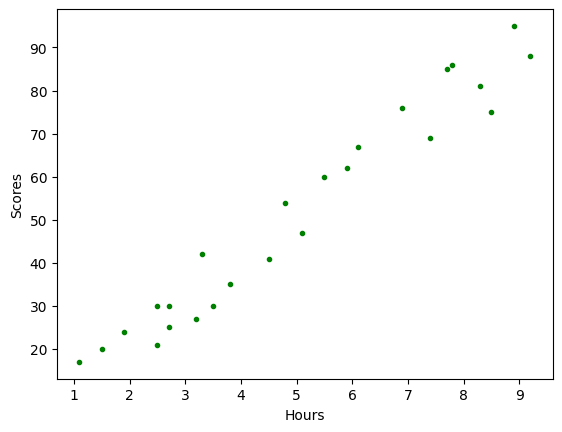

In [28]:
plt.plot(df['Hours'], df['Scores'], 'g.')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

In [29]:
x_train, x_test, y_train, y_test = train_test_split(df['Hours'].values, df['Scores'].values, test_size=0.2, random_state=1)
x_train = x_train.reshape(-1, 1)
x_test = x_test.reshape(-1, 1)
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

In [30]:
LinReg = LinearRegression()
LinReg.fit(x_train, y_train)

LinearRegression()

In [31]:
print('intercept: ', LinReg.intercept_, '\n', 'coefficient: ', LinReg.coef_, sep='')

intercept: [-1.53695733]
coefficient: [[10.46110829]]


In [32]:
y_pred = LinReg.predict(x_test)

In [33]:
pd.DataFrame({'Actual': y_test.reshape(-1), 'Predicted': y_pred.reshape(-1)})

,Actual,Predicted
0,17,9.970262
1,42,32.984700
2,24,18.339148
3,75,87.382463
4,54,48.676362


In [34]:
LinReg.score(x_train, y_train)

0.9637848283990599

In [35]:
LinReg.score(x_test, y_test)

0.8421031525243527

In [36]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'MAE: {mae}', f'MSE: {mse}', f'RMSE: {rmse}', sep='\n')

MAE: 7.882398086270432
MSE: 68.88092074277635
RMSE: 8.299453038771674


### Наша модель виглядає досить лінійно і має непогані показники похибок зі звичайним розбиттям на тренувальну та тестову підмножини, незважаючи на те спробуємо провести К-кратну кросс валідацію

In [37]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

cnt = 1
train_test_folds = []

for train_index, test_index in kf.split(df['Hours'], df['Scores']):
    print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    train_test_folds.append((train_index, test_index))
    cnt += 1

Fold:1, Train set: 20, Test set:5
Fold:2, Train set: 20, Test set:5
Fold:3, Train set: 20, Test set:5
Fold:4, Train set: 20, Test set:5
Fold:5, Train set: 20, Test set:5


In [38]:
def rmse(score):
    rmse = np.sqrt(-score)
    print(f'rmse= {"{:.2f}".format(rmse)}')

In [39]:
x, y = df['Hours'].values.reshape(-1, 1), df['Scores'].values.reshape(-1, 1)

In [40]:
score = cross_val_score(LinearRegression(), x, y, cv= kf, scoring="neg_mean_squared_error")
print(f'Scores for each fold: {score}')
rmse(score.mean())

Scores for each fold: [-18.94321172 -25.59134275 -65.56533746 -31.60146724 -29.95977935]
rmse= 5.86


### Оскільки перший фолд показує найкращий результат спробуємо натренувати нашу модель по розподілу першого фолду

In [41]:
x_train, x_test, y_train, y_test = df['Hours'][train_test_folds[0][0]], df['Hours'][train_test_folds[0][1]], df['Scores'][train_test_folds[0][0]], df['Scores'][train_test_folds[0][1]]
x_train, x_test, y_train, y_test = x_train.values.reshape(-1, 1), x_test.values.reshape(-1, 1), y_train.values.reshape(-1, 1), y_test.values.reshape(-1, 1)
LinReg = LinearRegression()
LinReg.fit(x_train, y_train)

LinearRegression()

In [42]:
print('intercept: ', LinReg.intercept_, '\n', 'coefficient: ', LinReg.coef_, sep='')

intercept: [2.82689235]
coefficient: [[9.68207815]]


In [43]:
y_pred = LinReg.predict(x_test)

In [44]:
pd.DataFrame({'Actual': y_test.reshape(-1), 'Predicted': y_pred.reshape(-1)})

,Actual,Predicted
0,21,27.032088
1,81,83.188141
2,62,59.951153
3,30,27.032088
4,76,69.633232


In [45]:
LinReg.score(x_train, y_train)

0.9491209376364416

In [46]:
LinReg.score(x_test, y_test)

0.9678055545167994

In [47]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'MAE: {mae}', f'MSE: {mse}', f'RMSE: {rmse}', sep='\n')

MAE: 3.92075119020992
MSE: 18.94321172231522
RMSE: 4.352380006653282


### Як бачимо наші показники якості моделі значно покращилися